<a href="https://colab.research.google.com/github/nambiar/MachineLearning/blob/master/Session4/DigitDetector_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

This code takes in the input and we start with a very generic framework  .


1.   Kernel increasing in the order and decreasing when the receptive field reaches 10*10.
2.   Understanding the information in the image
3.   Image has a single channel ie Grey scale image 
4.  The idea is have a CNN creating many features in the starting and building on them later
5.  Can stopt at receptive field 7*7 or 10*10





In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import Convolution2D as Conv2D

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


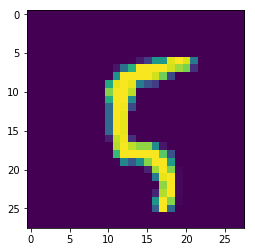

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
#plt.imshow(X_train[1])
plt.imshow(X_train[100])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Another inference to use lesser number of kernels is by noticing that 3*3 covers the middle segment of the image 5*5 to 20*20 more number of times and also this is the place where information (the feature)resides for most number of test images

In [13]:
from keras.layers import Activation
model = Sequential()

model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Conv2D(64, 3, 3, activation='relu')) # 24

model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Conv2D(32, 1, 1, activation='relu')) # 12 = 12*12*32

model.add(Conv2D(32, 3, 3, activation='relu')) # 10
model.add(Conv2D(64, 3, 3, activation='relu')) # 8

model.add(Conv2D(10, 1, activation='relu')) #7
model.add(Conv2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        2080      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 10)          650       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Training accuracy keeps on increasing starting from 95% and validation accuracy from 97%

In [16]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1,validation_data=(X_test, Y_test),)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.1507 - acc: 0.9534 - val_loss: 0.0610 - val_acc: 0.9781
Epoch 2/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0523 - acc: 0.9841 - val_loss: 0.0464 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0379 - acc: 0.9887 - val_loss: 0.0403 - val_acc: 0.9871
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0305 - acc: 0.9905 - val_loss: 0.0262 - val_acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0261 - acc: 0.9916 - val_loss: 0.0340 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0298 - val_acc: 0.9891
Epoch 7/10
60000/60000 [==============================] - 10s 173us/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.0344060315734163, 0.9915]


In [0]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[7.00110000e-16 9.53148964e-14 4.14636603e-10 1.25040506e-10
  4.53677960e-17 3.31509654e-14 1.96802826e-23 1.00000000e+00
  5.58098150e-14 9.35503203e-11]
 [3.53770534e-13 1.80012220e-11 1.00000000e+00 1.13020739e-17
  5.34579599e-17 4.65630265e-18 2.00023872e-10 2.58559647e-20
  1.32923642e-12 1.29660015e-17]
 [7.53764481e-11 9.99994993e-01 2.63594213e-08 3.40447982e-12
  4.09342283e-06 2.31611654e-08 4.99510766e-10 9.31648856e-07
  4.58014568e-08 2.27115063e-11]
 [9.99961138e-01 2.16921370e-13 1.03435949e-11 1.93690654e-11
  6.95160617e-13 3.98796907e-09 3.88829176e-05 1.39800498e-11
  6.02161043e-10 4.61471261e-09]
 [4.51025755e-17 6.44220441e-12 7.29500773e-15 8.10464364e-16
  1.00000000e+00 2.89428988e-16 1.50632848e-12 3.50175622e-09
  9.18771240e-11 1.33586768e-08]
 [2.39857374e-12 9.99998689e-01 3.79744858e-09 3.82161869e-15
  1.07444623e-06 4.45488698e-12 2.48485347e-12 2.17413373e-07
  2.35828534e-09 2.10475279e-12]
 [9.17438165e-23 7.23203745e-12 2.07540504e-14 1.63447299e